# Import Libraries

In [680]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# Read data

In [681]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [682]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [683]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [684]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

# Data cleaning and featuring

In [685]:
# Descriptive statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [686]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


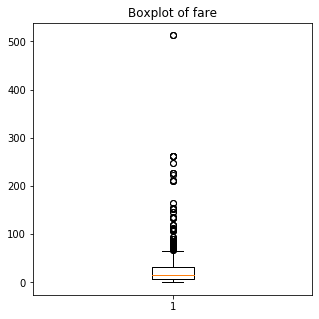

In [687]:
plt.subplots(figsize=(5,5))
plt.boxplot(train_data['Fare'])
plt.title('Boxplot of fare')
plt.show()

In [688]:
# Retrieve train data with fare greater than 500
train_data[train_data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [689]:
# Number of missing values in each column in train data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [690]:
# Number of missing values in each column in test data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [691]:
# Function to extract title from passenger's name
def extract_title(df):
    title = df['Name'].apply(lambda name:name.split(',')[1].split('.')[0].strip())
    return title

In [692]:
# Count of each title in train data
train_data['Title'] = extract_title(train_data)
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Don               1
Lady              1
Capt              1
Ms                1
Jonkheer          1
Sir               1
the Countess      1
Name: Title, dtype: int64

In [693]:
# Count of each title in test data
test_data['Title'] = extract_title(test_data)
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [694]:
def map_title(df):
    title_category = {
        "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
    }
    new_title = df['Title'].map(title_category)
    return new_title

In [695]:
train_data['Title']=map_title(train_data)
train_data['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [696]:
test_data['Title']=map_title(test_data)
test_data['Title'].value_counts()

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: Title, dtype: int64

In [697]:
#Now that we have extracted titles from names, we can group data by title and impute missing age 
#values using the median age of each category. We will also group by 'Pclass' as it will help in 
#accurately calculating the median age within each class.

#Note: We are using median value instead of mean because extreme values (or outliers) have a lot 
#more impact on mean than median.

# Group train data by 'Pclass', 'Title' and calculate the median age
train_data.groupby(['Pclass','Title']).median()['Age']

Pclass  Title  
1       Master      4.0
        Miss       30.0
        Mr         40.0
        Mrs        40.0
        Officer    50.0
        Royalty    40.0
2       Master      1.0
        Miss       24.0
        Mr         31.0
        Mrs        31.5
        Officer    46.5
3       Master      4.0
        Miss       18.0
        Mr         26.0
        Mrs        31.0
Name: Age, dtype: float64

In [698]:
# Function to identify passengers who have the title 'Miss' and, 1 or 2 value in the 'Parch' column
def is_young(df):
    young = []
    for index, value in df['Parch'].items():
        if ((df.loc[index, 'Title'] == 'Miss') and (value == 1 or value == 2)):
            young.append(1)
        else:
            young.append(0)
    return young

In [699]:
# Group train data by 'Pclass', 'Title', 'Is_Young(Miss)' and calculate the median age
train_data['Is_Young(Miss)'] = is_young(train_data)
grouped_age = train_data.groupby(['Pclass', 'Title', 'Is_Young(Miss)']).median()['Age']
grouped_age

Pclass  Title    Is_Young(Miss)
1       Master   0                  4.0
        Miss     0                 31.0
                 1                 20.0
        Mr       0                 40.0
        Mrs      0                 40.0
        Officer  0                 50.0
        Royalty  0                 40.0
2       Master   0                  1.0
        Miss     0                 30.0
                 1                  7.0
        Mr       0                 31.0
        Mrs      0                 31.5
        Officer  0                 46.5
3       Master   0                  4.0
        Miss     0                 21.0
                 1                  5.0
        Mr       0                 26.0
        Mrs      0                 31.0
Name: Age, dtype: float64

In [700]:
test_data['Is_Young(Miss)'] = is_young(test_data)

In [701]:
# Fill missing age values in train and test data
train_data.set_index(['Pclass', 'Title', 'Is_Young(Miss)'], drop=False, inplace=True)
train_data['Age'].fillna(grouped_age, inplace=True)
train_data.reset_index(drop=True, inplace=True)
test_data.set_index(['Pclass', 'Title', 'Is_Young(Miss)'], drop=False, inplace=True)
test_data['Age'].fillna(grouped_age, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [702]:
# Group train data by 'Pclass' and calculate the median fare
grouped_fare = train_data.groupby('Pclass').median()['Fare']
grouped_fare

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [703]:
# Fill the missing fare value in test data
train_data.set_index(['Pclass'], drop=False, inplace = True)
train_data['Fare'].fillna(grouped_fare, inplace = True)
train_data.reset_index(drop=True, inplace=True)

test_data.set_index(['Pclass'], drop=False, inplace = True)
test_data['Fare'].fillna(grouped_fare, inplace = True)
test_data.reset_index(drop=True, inplace=True)


In [704]:
# Drop unnecessary rows and columns
train_data.drop(columns=['Name', 'Cabin', 'Ticket', 'Is_Young(Miss)'], inplace=True)
test_data.drop(columns=['Name', 'Cabin', 'Ticket', 'Is_Young(Miss)'], inplace=True)
train_data.dropna(subset=['Embarked'], inplace =True)

In [705]:
# Missing values in train data after data cleaning
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [706]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

#  Exploratory Data Analysis

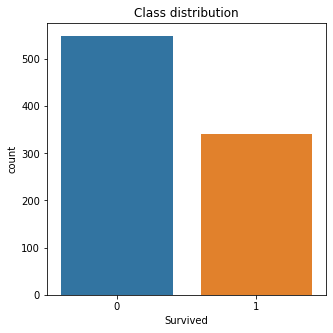

In [707]:
plt.subplots(figsize= (5,5))
sns.countplot(x='Survived',data = train_data)
plt.title('Class distribution')
plt.show()

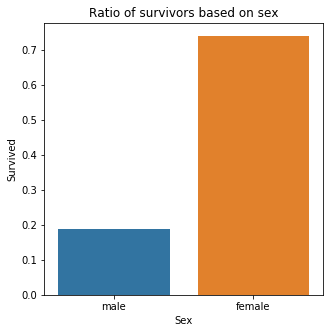

In [708]:
plt.subplots(figsize= (5,5))
sns.barplot(x='Sex', y = 'Survived',data = train_data, ci = None)
plt.title('Ratio of survivors based on sex')
plt.show()

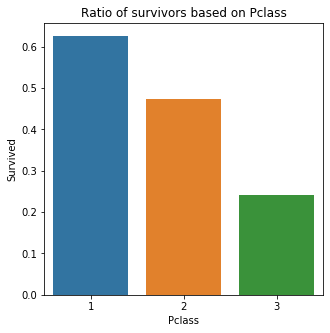

In [709]:
plt.subplots(figsize= (5,5))
sns.barplot(x='Pclass', y = 'Survived',data = train_data, ci = None)
plt.title('Ratio of survivors based on Pclass')
plt.show()

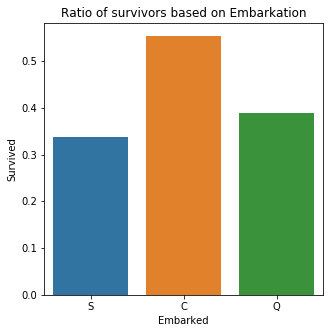

In [710]:
plt.subplots(figsize= (5,5))
sns.barplot(x='Embarked', y = 'Survived',data = train_data, ci = None)
plt.title('Ratio of survivors based on Embarkation')
plt.show()

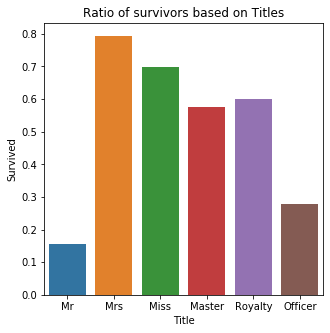

In [711]:
plt.subplots(figsize= (5,5))
sns.barplot(x='Title', y = 'Survived',data = train_data, ci = None)
plt.title('Ratio of survivors based on Titles')
plt.show()

In [712]:
# Note: The accuracy of these findings also depends on other factors such as the 
#frequency distribution within each categorical variable. For example, if there 
#is only 1 female in the entire dataset and she survived, then the survival rate
#of females will be 100% which cannot be considered a concrete finding. Hence, 
#depending on the type of problem being solved, further data analysis should be 
#done if required.

#Next, we will compute the pairwise correlation of different variables, focusing
#mainly on how different features correlate with the target variable 'Survived'. 
#But first, we need to convert all of the categorical variables into numeric data type.

In [713]:
# To convert 'Sex' variable into numeric format, we will simply encode male with 1 and female with 0.

le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.fit_transform(test_data['Sex'])

#For 'Embarked' and 'Title' variables, we will use dummy variables to represent different values.

train_data = pd.get_dummies(train_data,columns = ['Embarked','Title'])
test_data = pd.get_dummies(test_data,columns = ['Embarked','Title'])

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0
1,2,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0
4,5,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0


In [714]:
# Finally we can calculate the correlation

corr =train_data.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.035304,-0.057686,-0.001657,0.012703,-0.001208,-0.033694,0.022269,-0.026218,-0.064014,0.039008,0.005437,0.055440,0.031681
Survived,-0.005028,1.000000,-0.335549,-0.541585,-0.055756,-0.034040,0.083151,0.255290,0.169966,0.004536,-0.151777,0.085998,0.332094,-0.547689,0.343836,-0.030963,0.033666
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.412684,0.081656,0.016824,-0.548193,-0.245733,0.220558,0.076466,0.081547,-0.006737,0.139156,-0.151780,-0.149428,-0.118241
Sex,0.043136,-0.541585,0.127741,1.000000,0.111186,-0.116348,-0.247508,-0.179958,-0.084520,-0.075217,0.121405,0.159612,-0.692363,0.866888,-0.552629,0.088976,-0.007728
Age,0.035304,-0.055756,-0.412684,0.111186,1.000000,-0.299570,-0.199577,0.113625,0.049316,-0.086584,0.011295,-0.392649,-0.305175,0.215257,0.191443,0.189013,0.069560
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.299570,1.000000,0.414542,0.160887,-0.060074,-0.026692,0.069438,0.349434,0.085939,-0.252201,0.061261,-0.024872,-0.008467
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.199577,0.414542,1.000000,0.217532,-0.011588,-0.081585,0.061512,0.267194,0.103551,-0.335765,0.223240,-0.048377,-0.035673
Fare,0.012703,0.255290,-0.548193,-0.179958,0.113625,0.160887,0.217532,1.000000,0.270731,-0.116684,-0.163758,0.011390,0.119660,-0.181692,0.103920,0.010679,0.015222
Embarked_C,-0.001208,0.169966,-0.245733,-0.084520,0.049316,-0.060074,-0.011588,0.270731,1.000000,-0.148646,-0.782613,-0.035471,0.038498,-0.073976,0.067462,-0.008192,0.078960
Embarked_Q,-0.033694,0.004536,0.220558,-0.075217,-0.086584,-0.026692,-0.081585,-0.116684,-0.148646,1.000000,-0.499261,0.010330,0.169631,-0.079283,-0.090739,0.012520,-0.023159


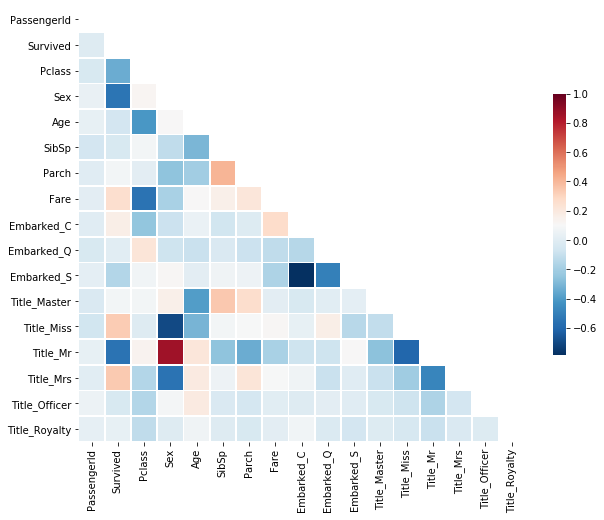

In [715]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, cmap='RdBu_r',  linewidths=0.7,cbar_kws={'shrink': 0.6})
plt.show()

# Model Building and evaluation

In [716]:
#Before we can start building the machine learning models, we need to apply feature scaling
#to standardize the independent variables within a particular range. This is required because 
#some machine learning algorithms (such as kNN) tend to give more weightage to features with
#high magnitudes than features with low magnitudes, regardless of the unit of the values. 
#To bring all features to the same level of magnitudes, we need to apply feature scaling.

#In this case, we will use the MinMaxScaler to scale each feature to a (0, 1) range.

# Apply feature scaling using MinMaxScaler
scaler = MinMaxScaler()
train_data.iloc[:, 2:] = scaler.fit_transform(train_data.iloc[:, 2:])
test_data.iloc[:, 1:] = scaler.transform(test_data.iloc[:, 1:])

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [717]:
X_train, X_test, y_train = train_data.iloc[:, 2:], test_data.iloc[:, 1:], train_data['Survived']

In [718]:
# Function to generate submission file to get test score
def submission(preds):
    test_data['Survived'] = preds
    predictions = test_data[['PassengerId', 'Survived']]
    predictions.to_csv('submission.csv', index=False)

## Logistic regression

In [719]:
seed = 101
#Classification model
#logreg = LogisticRegression()

## Parameters to tune
#params = [{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          # 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

# Hyperparameter tuning using GridSearchCV
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=seed)
#lr_clf = GridSearchCV(logreg, params, cv=cv, n_jobs=-1)
#lr_clf.fit(X_train, y_train)

In [720]:
## Best parameters
#lr_clf.best_params_

In [721]:
## Train score
#lr_clf.best_score_

In [722]:
# Test score
#y_preds = lr_clf.predict(X_test)
#submission(y_preds)

## Additional - SVM

In [723]:
from sklearn.svm import SVC
# Classification model
svm = SVC(max_iter=10000)

# Parameters to tune
params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
           'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

# Hyperparameter tuning using GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=seed)
svm_clf = GridSearchCV(svm, params, cv=cv, n_jobs=-1)
svm_clf.fit(X_train, y_train)

# Best parameters
svm_clf.best_params_


{'C': 1, 'kernel': 'poly'}

In [724]:
# Train score
svm_clf.best_score_

0.8284548974798451

In [725]:
# Test score
y_preds = lr_clf.predict(X_test)
submission(y_preds)